# Gaussian Process Regression: Airline Passengers Data Set

   #Passengers
0          112
1          118
2          132
3          129
4          121


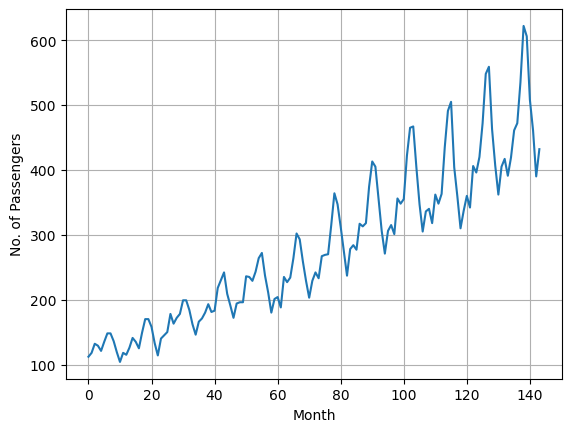

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

df = pd.read_csv('AirPassengers.csv',usecols=[1])
print(df.head())

plt.plot(np.arange(0,len(df)),df)
plt.grid()
plt.ylabel('No. of Passengers')
plt.xlabel('Month')
plt.show()

Split the data into 70% training and 30% testing.

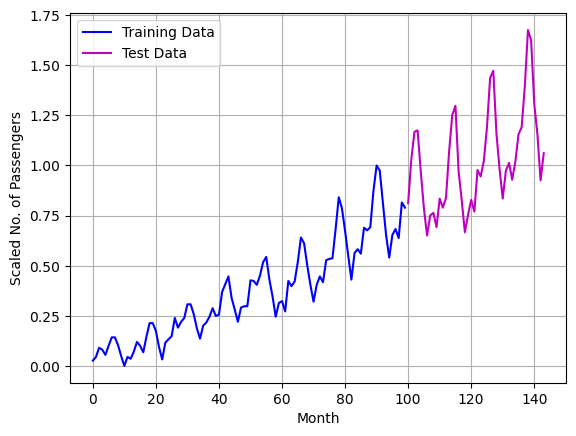

(100, 1)
(100, 1)
(44, 1)
(44, 1)


In [2]:
train_size = int(len(df) * 0.7)
X_train = np.arange(0,train_size).reshape(-1,1)
X_test = np.arange(train_size,len(df)).reshape(-1,1)
y_train, y_test = df[0:train_size], df[train_size:]

scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)

plt.plot(np.arange(0,len(y_train_scaled)), y_train_scaled,'b')
plt.plot(np.arange(len(y_train_scaled),len(df)), y_test_scaled, 'm')
plt.grid()
plt.legend(('Training Data','Test Data'))
plt.ylabel('Scaled No. of Passengers')
plt.xlabel('Month')
plt.show()
print(X_train.shape)
print(y_train_scaled.shape)
print(X_test.shape)
print(y_test_scaled.shape)

Define the kernel composition and fit using GPR.

In [3]:
SExPER_kernel = (RBF(length_scale=1.5) * ExpSineSquared(length_scale=0.5, periodicity=12))

noise_kernel = WhiteKernel(noise_level=0.01)

overall_kernel = (SExPER_kernel + noise_kernel)

y_mean = y_train_scaled.mean()

GPR = GaussianProcessRegressor(kernel=overall_kernel, 
                               normalize_y=False, 
                               n_restarts_optimizer=10,
                               random_state=0)
GPR.fit(X_train, y_train_scaled - y_mean)

GaussianProcessRegressor(kernel=RBF(length_scale=1.5) * ExpSineSquared(length_scale=0.5, periodicity=12) + WhiteKernel(noise_level=0.01),
                         n_restarts_optimizer=10, random_state=0)

Predict on test data and visualize results.

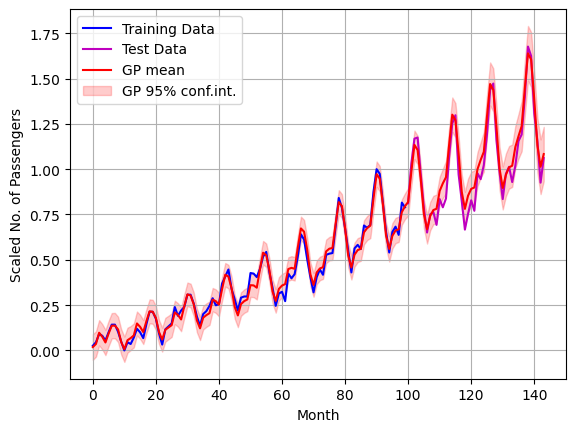

Optimized kernel:
RBF(length_scale=179) * ExpSineSquared(length_scale=1.57, periodicity=12) + WhiteKernel(noise_level=0.000967)
Training MSE: 0.0007858767229793949
Testing MSE: 0.004509114222736137


In [11]:
X = np.arange(0,len(df)).reshape(-1,1)
mean_y_pred, std_y_pred = GPR.predict(X, return_std=True)
mean_y_pred += y_mean
plt.plot(np.arange(0,len(y_train_scaled)), y_train_scaled,'b',label='Training Data')
plt.plot(np.arange(len(y_train_scaled),len(df)), y_test_scaled,'m',label='Test Data')
plt.plot(X,mean_y_pred,'r',label='GP mean')
plt.fill_between(
    X.ravel(),
    mean_y_pred - 1.96*std_y_pred,
    mean_y_pred + 1.96*std_y_pred,
    color='r',
    alpha=0.2,
    label='GP 95% conf.int.'
)
plt.ylabel('Scaled No. of Passengers')
plt.xlabel('Month')
plt.grid()
plt.legend()
plt.show()
print('Optimized kernel:')
print(GPR.kernel_)
train_mse = mean_squared_error(y_train_scaled, mean_y_pred[:train_size])
test_mse = mean_squared_error(y_test_scaled, mean_y_pred[train_size:len(df)])
print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")